In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [9]:
df = pd.read_csv('dados.csv', sep = ';', encoding = "ISO-8859-1")

In [10]:
df.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
0,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2,2011/1,CIC0007,27990
1,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,ENM0068,27990
2,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,ENM0071,27990
3,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,FGA0008,27990
4,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2,2011/1,FGA0009,27990


In [11]:
df.dtypes

IDFluxo         object
Status           int64
Matriculas       int64
Ingresso        object
IDDisciplina    object
IDEstudante      int64
dtype: object

In [12]:
df['IDFluxo'].unique()

array(['ENGENHARIA AEROESPACIAL/FGA - Bacharel - Presencial - D - 20121',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20172',
       'ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20162',
       'ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20171',
       'ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20152',
       'ENGENHARIA/FGA - Bacharel - Presencial - D - 20082'], dtype=object)

In [13]:
df['Ingresso'].unique()

array(['2011/1', '2012/1', '2012/2', '2013/1', '2013/2', '2014/1',
       '2014/2', '2015/1', '2015/2', '2016/1', '2016/2', '2017/1',
       '2017/2', '2018/1', '2018/2', '2019/1', '2019/2', '2020/1',
       '2020/2', '2021/1', '2010/2', '2011/2', '2009/2', nan, '2021/2'],
      dtype=object)

In [14]:
df['IDDisciplina'].unique()

array(['CIC0007', 'ENM0068', 'ENM0071', 'FGA0008', 'FGA0009', 'FGA0011',
       'FGA0021', 'FGA0037', 'FGA0038', 'FGA0039', 'FGA0043', 'FGA0044',
       'FGA0045', 'FGA0048', 'FGA0050', 'FGA0063', 'FGA0066', 'FGA0075',
       'FGA0078', 'FGA0117', 'FGA0133', 'FGA0134', 'FGA0139', 'FGA0143',
       'FGA0144', 'FGA0148', 'FGA0150', 'FGA0153', 'FGA0157', 'FGA0160',
       'FGA0161', 'FGA0162', 'FGA0164', 'FGA0167', 'FGA0168', 'FGA0169',
       'FGA0178', 'FGA0179', 'FGA0181', 'FGA0184', 'FGA0186', 'FGA0187',
       'FGA0188', 'FGA0196', 'FGA0197', 'FGA0204', 'FGA0235', 'FGA0250',
       'FGA0254', 'IFD0171', 'IFD0173', 'IQD0125', 'IQD0126', 'MAT0024',
       'MAT0026', 'MAT0027', 'MAT0030', 'ENM0080', 'FGA0027', 'FGA0034',
       'FGA0055', 'FGA0056', 'FGA0086', 'FGA0087', 'FGA0093', 'FGA0102',
       'FGA0119', 'FGA0120', 'FGA0151', 'FGA0155', 'FGA0163', 'FGA0190',
       'FGA0191', 'FGA0195', 'FGA0228', 'FGA0229', 'FGA0230', 'FGA0231',
       'FGA0232', 'FGA0268', 'FGA0282', 'FGA0052', 

In [17]:
len(df.loc[(df['Ingresso'] == 'nan')])

0

In [18]:
X = df.drop('Status', axis=1).copy()
X.head()

,IDFluxo,Matriculas,Ingresso,IDDisciplina,IDEstudante
0,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,2011/1,CIC0007,27990
1,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2011/1,ENM0068,27990
2,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2011/1,ENM0071,27990
3,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2011/1,FGA0008,27990
4,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,2011/1,FGA0009,27990


In [19]:
y = df['Status'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [20]:
X.dtypes

IDFluxo         object
Matriculas       int64
Ingresso        object
IDDisciplina    object
IDEstudante      int64
dtype: object

In [21]:
X['IDFluxo'].unique()

array(['ENGENHARIA AEROESPACIAL/FGA - Bacharel - Presencial - D - 20121',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20172',
       'ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20162',
       'ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20171',
       'ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20082',
       'ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20152',
       'ENGENHARIA/FGA - Bacharel - Presencial - D - 20082'], dtype=object)

In [22]:
pd.get_dummies(X, columns=['IDFluxo']).head()

,Matriculas,Ingresso,IDDisciplina,IDEstudante,IDFluxo_ENGENHARIA AEROESPACIAL/FGA - Bacharel - Presencial - D - 20121,IDFluxo_ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20172,IDFluxo_ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20162,IDFluxo_ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20171,IDFluxo_ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20152,IDFluxo_ENGENHARIA/FGA - Bacharel - Presencial - D - 20082
0,2,2011/1,CIC0007,27990,1,0,0,0,0,0,0,0,0,0
1,1,2011/1,ENM0068,27990,1,0,0,0,0,0,0,0,0,0
2,1,2011/1,ENM0071,27990,1,0,0,0,0,0,0,0,0,0
3,1,2011/1,FGA0008,27990,1,0,0,0,0,0,0,0,0,0
4,2,2011/1,FGA0009,27990,1,0,0,0,0,0,0,0,0,0


In [25]:
X_encoded = pd.get_dummies(X, columns=['IDFluxo', 'Ingresso', 'IDDisciplina'])
X_encoded.head()

,Matriculas,IDEstudante,IDFluxo_ENGENHARIA AEROESPACIAL/FGA - Bacharel - Presencial - D - 20121,IDFluxo_ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20172,IDFluxo_ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20162,IDFluxo_ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20171,IDFluxo_ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20082,...,IDDisciplina_MAT0027,IDDisciplina_MAT0030,IDDisciplina_MAT0031,IDDisciplina_MAT0037,IDDisciplina_MAT0038,IDDisciplina_MAT0039,IDDisciplina_MAT0048,IDDisciplina_MAT0053,IDDisciplina_MAT0059,IDDisciplina_MAT0137
0,2,27990,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,27990,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,27990,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,27990,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,27990,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y.unique()

array([1, 2, 5], dtype=int64)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

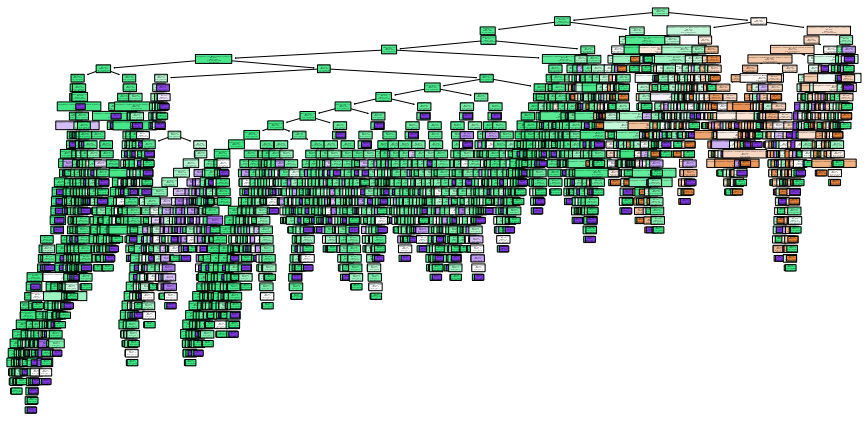

In [28]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True,
        class_names=["Formado", "Matrículado", "Evadido"],
        feature_names=X_encoded.columns);

C:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


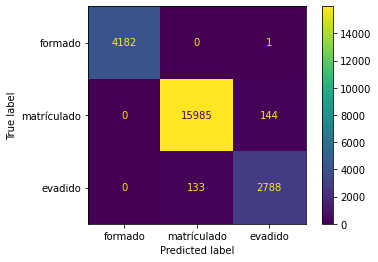

In [32]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels =["formado", "matrículado", "evadido"])

In [35]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

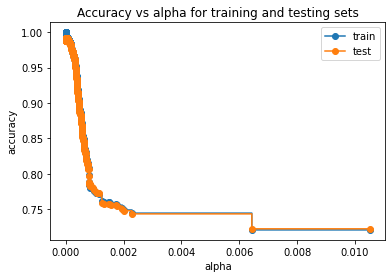

In [37]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label ="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

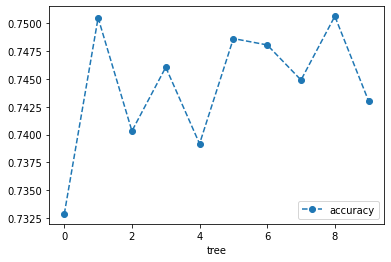

In [40]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.004)
scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

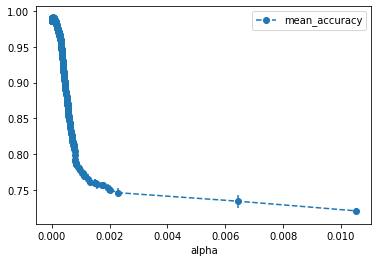

In [42]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                    y='mean_accuracy',
                    yerr='std',
                    marker='o',
                    linestyle='--')

In [45]:
alpha_results[(alpha_results['alpha'] >0.000)
& (alpha_results['alpha'] < 0.001)]

,alpha,mean_accuracy,std
1,0.000009,0.986872,0.001987
2,0.000009,0.986872,0.001987
3,0.000009,0.986872,0.001987
4,0.000009,0.986872,0.001987
5,0.000009,0.986872,0.001987
...,...,...,...
526,0.000843,0.785965,0.004153
527,0.000843,0.785908,0.004135
528,0.000897,0.782508,0.003496
529,0.000930,0.780298,0.002934


In [48]:
ideal_ccp_alpha = 0.000009

ideal_ccp_alpha

9e-06

In [49]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

9e-06

In [50]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                        ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

C:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


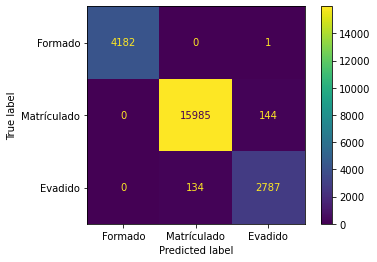

In [51]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["Formado", "Matrículado", "Evadido"])

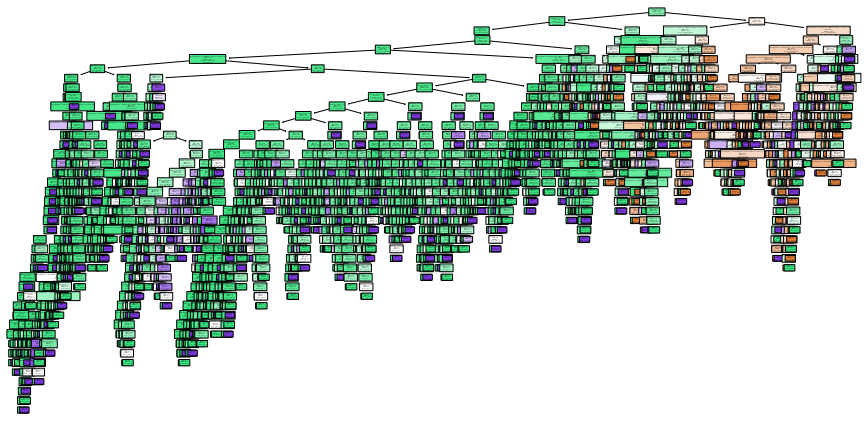

In [52]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=["Formado", "Matrículado", "Evadido"], feature_names=X_encoded.columns);

In [55]:
y_pred = clf_dt_pruned.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4183
           2       0.99      0.99      0.99     16129
           5       0.95      0.95      0.95      2921

    accuracy                           0.99     23233
   macro avg       0.98      0.98      0.98     23233
weighted avg       0.99      0.99      0.99     23233

